# Problema 7.5

<style type="text/css">
    ol { list-style-type: lower-alpha; }
</style>

Los marcapasos electrónicos actúan sobre el corazón de manera que este responda adecuadamente al ritmo cardiaco deseado. La situación dinámica se puede representar por el bucle de control retroalimentado de la figura adjunta:

![prob705.svg](./img/prob705.svg)

Se ha establecido que la función de transferencia del marcapasos es $\frac{K}{0.1 s+1}$ y la del colarzon es $\frac{1}{s}$. El ritmo cardiaco normal es de 70 pulsaciones/min.

Determinar:

1. Si $K = 10$, ¿cuánto vale la constante de tiempo de todo el sistema? ¿Qué sentido físico tiene dicha constante?

2. Si se produjera una perturbación sostenida de 10 pulsaciones en exceso, ¿qué ritmo cardiaco estacionario se alcanzaría?

3. Suponer que el individuo puede tolerar durante períodos de tiempo no excesivos un ritmo cardiaco de 110 pulsaciones/min, siempre que en ningún caso se llegue a 130, aunque sea puntualmente. ¿Qué valor ha de tener $K$ para que un paso súbito de 70 a 110 pulsaciones/min en la consigna sea tolerable para el individuo?

---

**Solición**

a) El lazo de control propuesto se puede representar como:

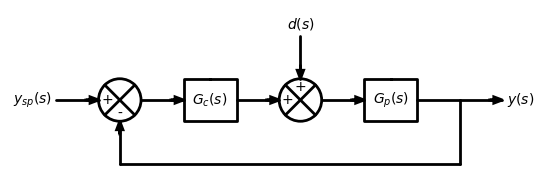

In [11]:
using PyCall, LaTeXStrings

schemdraw = pyimport("schemdraw")
dsp = pyimport("schemdraw.dsp")

d = schemdraw.Drawing(unit=1, fontsize=10)

d.add(dsp.Arrow().right().label(L"y_{sp}(s)", "left"))
suma = d.add(dsp.Mixer(W="+", S="-").anchor("W"))
d.add(dsp.Arrow().right().at(suma.E))
control = d.add(dsp.Box(w=1.25, h=1).label(L"G_c(s)").anchor("W"))
d.add(dsp.Arrow().right().at(control.E))
suma2 = d.add(dsp.Mixer(W="+", N="+").anchor("W"))
d.push()
d.add(dsp.Arrow().up().reverse().at(suma2.N).label(L"d(s)", "right"))
d.pop()
d.add(dsp.Arrow().right().at(suma2.E))
proc = d.add(dsp.Box(w=1.25, h=1).label(L"G_p(s)").anchor("W"))
d.add(dsp.Line().right().at(proc.E))
dot = d.add(dsp.Dot(radius=0))
d.push()
d.add(dsp.Arrow().right().label(L"y(s)", "right"))
d.pop()
d.add(dsp.Line().down().length(1.5).at(dot.center))
d.add(dsp.Line().left().tox(suma.S))
d.add(dsp.Arrow().up().to(suma.S))

d.draw(show=false)

donde:

$$\begin{aligned}
  G_c &= \frac{K}{0.1 s + 1}\\
  G_p &= \frac{1}{s}
\end{aligned}$$

Para poder tomar variables de desviación se tomará como valor estacionario de la consigna:

$$y_{sp, e} = 70 \text{ pulsaciones/min}$$

La función de transferencia que relaciona los cambios de la consigna con
la salida será:

$$G = \frac{y}{y_{sp}} = \frac{G_c G_p}{1 + G_c G_p} = \frac{K}{0.1
   s^2 + s + K} = \frac{1}{\frac{0.1}{K} s^2 + \frac{1}{K} s + 1}$$
   
Si $K = 10$, la constante de tiempo será (al tratarse de un sistema de
segundo orden):

$$\tau = \sqrt{\frac{0.1}{10}} = 0.1 \min$$

La constante de tiempo mide la inercia del sistema marcapasos-corazón frente a cambios en la consigna o perturbaciones.

b) En este caso, se realiza un cambio en las perturbaciones es forma de escalón de altura 10 pulsaciones/min:

![prob705a.svg](./img/prob705a.svg)

Al tratarse de un escalón, la transformada de Laplace, tomando variables de desviación, de las perturbaciones será:

$$d (s) = \frac{10}{s}$$

Al buscarse el efecto estacionario de un cambio en las perturbaciones sobre la salida del lazo de control (ritmo cardiaco) es necesario conocer la función de transferencia que relaciona $y (s)$ con $d (s)$:

$$\frac{y (s)}{d (s)} = \frac{G_p}{1 + G_c G_p} = \frac{\frac{0.1 s +1}{K}}{\frac{0.1}{K} s^2 + \frac{1}{K} s + 1}$$
   
Calcular la respuesta estacionaria es equivalente a pedir calcular el *offset*, sabiendo que
$K = 10$ y que no se produce ningún cambio en la consigna:

$$\mathrm{offset} = \lim_{t \to \infty} y_{sp} (t) - \lim_{t \to \infty} y (t) = 0 - \lim_{s \to 0} s \frac{y (s)}{d (s)} d (s) = - \lim_{s \to 0} s \frac{\frac{0.1 s + 1}{10}}{\frac{0.1}{10} s^2 + \frac{1}{10} s + 1} \frac{10}{s} = - 1$$
   
Es importante resaltar que el signo negativo del *offset* indica que el valor estacionario de la salida está por encima de la consigna.

El ritmo cardiaco estacionario alcanzado será de 71 pulsaciones/min, al deshacer las variables de desviación.

c\) Se desea conocer $K$ para que en caso de que el corazón pueda sufrir una aumento de ritmo cardiaco (por ejemplo, al verse sometido a un esfuerzo, es decir, a una perturbación) sin que se supere un cierto límite.

El sistema marcapasos-corazón forma un sistema de segundo orden, lo que significa que cuando se realiza un cambio, ya sea en al consigna o en las perturbaciones, puede dar respuestas oscilatorias subamortiguadas. De manera cualitativa, el caso límite sería:

![prob705b.svg](./img/prob705b.svg)

El valor inicial del ritmo cardiaco es de 70 pulsaciones/min, el valor estacionario es de 110 pulsaciones/min y el valor máximo es de 130 pulsaciones/min. A partir de estos datos se puede calcular el *overshoot* utilizando su definición:

$$\mathrm{Overshoot} = \frac{A}{B} = \frac{130 - 110}{110 - 70} = 0.5$$

Al tratarse de una función de transferencia de segundo orden:

$$\mathrm{Overshoot} = \exp \left( - \frac{\pi \zeta}{\sqrt{1 - \zeta^2}} \right) = 0.5$$

Resolviendo la ecuación se encuentra que el coeficiente de amortiguamiento es: 

$$\zeta = 0.2155$$ 

Del apartado anterior se sabe que:

$$\begin{aligned}
  \tau &= \sqrt{\frac{0.1}{K}} \\
  2 \tau \zeta &= \frac{1}{K}
\end{aligned}$$

Resolviendo el sistema de ecuaciones se encuentra:

$$K = 53.8$$

Por tanto, *K* debe ser menor de 53.8 para que en ningún caso se alcance 130 pulsaciones/min.